In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydra.model import plot
import hydra.model.helper as helper
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo

In [2]:
FILENAME = "2020-06-19-02-13-00-409961"
METAPATH = "./results/data/meta.txt"

# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 400, 200)
calcium.shape

(3000, 400, 200)

In [3]:
calcium_ecto = calcium[:, :200, :]
calcium_endo = calcium[:, 200:, :]

In [4]:
force_ecto = helper.encode_force_2d(ForceEncoderEcto, calcium_ecto, 200, 200, 0.1, save_interval=1)
force_endo = helper.encode_force_2d(ForceEncoderEndo, calcium_endo, 200, 200, 0.1, save_interval=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:23<00:00, 129.45it/s]


In [5]:
MOMENT = 135

DT = 0.1

In [6]:
frame_calcium_ecto = calcium_ecto[int(MOMENT/DT)]
frame_calcium_endo = calcium_endo[int(MOMENT/DT)]
frame_force_ecto = force_ecto[int(MOMENT/DT)]
frame_force_endo = force_endo[int(MOMENT/DT)]

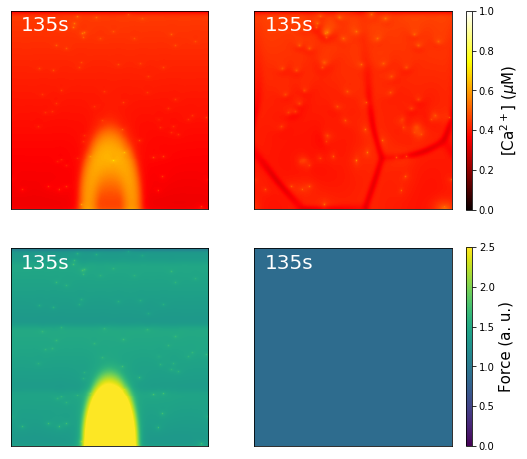

In [9]:
fig = plt.figure(figsize=(8, 8))

TEXTSIZE = 20

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(np.flip(frame_calcium_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax1.text(10, 20, str(int(MOMENT)) + 's', color='white', fontsize=TEXTSIZE)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(2, 2, 2)
im_ca = ax2.imshow(np.flip(frame_calcium_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax2.text(10, 20, str(int(MOMENT)) + 's', color='white', fontsize=TEXTSIZE)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(np.flip(frame_force_ecto.T, 0), cmap='inferno', vmin=0, vmax=2.5)
ax3.text(10, 20, str(int(MOMENT)) + 's', color='white', fontsize=TEXTSIZE)
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(2, 2, 4)
im_fo = ax4.imshow(np.flip(frame_force_endo.T, 0), cmap='inferno', vmin=0, vmax=2.5)
ax4.text(10, 20, str(int(MOMENT)) + 's', color='white', fontsize=TEXTSIZE)
ax4.set_xticks([])
ax4.set_yticks([])


font = {'size':TEXTSIZE-5}
cax1 = fig.add_axes([0.92, 0.535, 0.01, 0.345])
cb1 = plt.colorbar(im_ca, cax=cax1)
cb1.set_label(r"[Ca$^{2+}$] ($\mu$M)", fontdict=font)

cax2 = fig.add_axes([0.92, 0.125, 0.01, 0.345])
cb2 = plt.colorbar(im_fo, cax=cax2)
cb2.set_label(r"Force (a. u.)", fontdict=font)

plt.show()